In [76]:
from h5py import File
from numpy import array
from scipy.stats import skew,kurtosis
from numpy import mean, trapz, vstack, concatenate,std
import matplotlib.pyplot
import numpy 
import scipy
import biosignalsnotebooks as bsnb
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as ft
import re

def fundamental_range_freq(signal):
  N_size = len(signal);
  w = 2*np.pi* np.arange(N_size)/ N_size;
  w = ft.fftshift(w);
  w = np.unwrap(w - 2*np.pi);
  return w


In [77]:
Fs = 250  #Obtenido de BCI
Ts=1/Fs

#print(f" Fs={Fs} hz\n Ts={Ts} s")

senal= np.genfromtxt("./OpenBCI.txt", delimiter=", ",skip_header = 5)

M = senal[:,1].shape[0]
n = np.arange(0,M) #numero de muestras

fs=250

Ts=1/fs
t = n*Ts
t1=250*140
t2=250*170
T=t[t1:t2]

EO_ch1=senal[t1:t2,1];pre_ch1_PS=EO_ch1-(sum(EO_ch1)/len(EO_ch1))
EO_ch2=senal[t1:t2,2];pre_ch2_PS=EO_ch2-(sum(EO_ch2)/len(EO_ch2))
EO_ch3=senal[t1:t2,3];pre_ch3_PS=EO_ch3-(sum(EO_ch3)/len(EO_ch3))
EO_ch4=senal[t1:t2,4];pre_ch4_PS=EO_ch4-(sum(EO_ch4)/len(EO_ch4))
EO_ch5=senal[t1:t2,5];pre_ch5_PS=EO_ch5-(sum(EO_ch5)/len(EO_ch5))
EO_ch6=senal[t1:t2,6];pre_ch6_PS=EO_ch6-(sum(EO_ch6)/len(EO_ch6))
EO_ch7=senal[t1:t2,7];pre_ch7_PS=EO_ch7-(sum(EO_ch7)/len(EO_ch7))
EO_ch8=senal[t1:t2,8];pre_ch8_PS=EO_ch8-(sum(EO_ch8)/len(EO_ch8))

In [78]:

t1=250*180; t2=250*220
T=t[t1:t2]

EO_ch1=senal[t1:t2,1];pre_ch1_PC=EO_ch1-(sum(EO_ch1)/len(EO_ch1))
EO_ch2=senal[t1:t2,2];pre_ch2_PC=EO_ch2-(sum(EO_ch2)/len(EO_ch2))
EO_ch3=senal[t1:t2,3];pre_ch3_PC=EO_ch3-(sum(EO_ch3)/len(EO_ch3))
EO_ch4=senal[t1:t2,4];pre_ch4_PC=EO_ch4-(sum(EO_ch4)/len(EO_ch4))
EO_ch5=senal[t1:t2,5];pre_ch5_PC=EO_ch5-(sum(EO_ch5)/len(EO_ch5))
EO_ch6=senal[t1:t2,6];pre_ch6_PC=EO_ch6-(sum(EO_ch6)/len(EO_ch6))
EO_ch7=senal[t1:t2,7];pre_ch7_PC=EO_ch7-(sum(EO_ch7)/len(EO_ch7))
EO_ch8=senal[t1:t2,8];pre_ch8_PC=EO_ch8-(sum(EO_ch8)/len(EO_ch8))


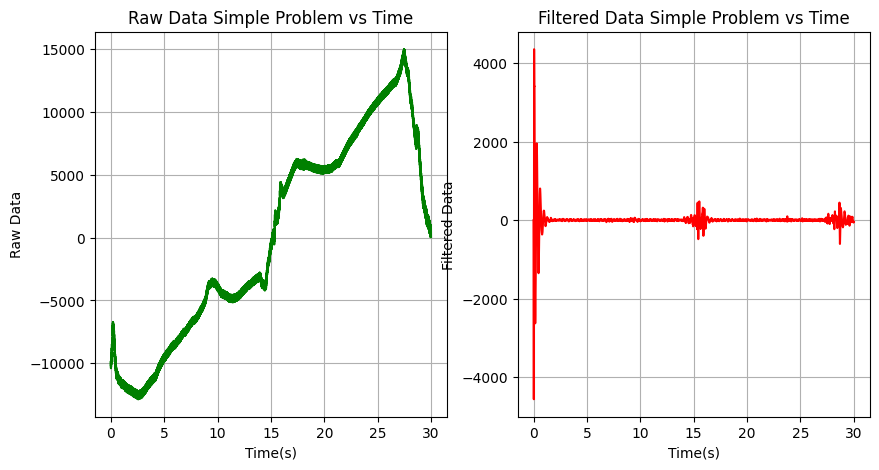

In [79]:

#Problema:
#Simple: 
#Complejo: 
sampling_rate=Ts

t_start=0
sample_start= t_start*sampling_rate

t_end=30
sample_end=t_end*sampling_rate

#Frecuencias de corte

low_cutoff_wide=3
high_cutoff_wide=30

filtered_signal_3_30=bsnb.bandpass(pre_ch4_PS, low_cutoff_wide,high_cutoff_wide,order=6,fs=250)
time=bsnb.generate_time(pre_ch4_PS,fs)

X1=ft.fftshift(ft.fft(pre_ch4_PS))
X2=ft.fftshift(ft.fft(filtered_signal_3_30))
#n1=np.arange(len(X1)); n2=np.arange(len(X2))
w1=fundamental_range_freq(X1); w2=fundamental_range_freq(X2)


n=np.arange(len(pre_ch1_PS))
plt.figure(1, figsize=(10,5))
plt.subplot(121)
plt.plot(n*Ts,pre_ch4_PS,"g")
plt.xlabel("Time(s)")
plt.ylabel("Raw Data")
plt.title("Raw Data Simple Problem vs Time")
plt.grid()
#plt.line(time, signal, legend_label="Datos Originales")
plt.subplot(122)
plt.plot(time,filtered_signal_3_30,"r")
plt.xlabel("Time(s)")
plt.ylabel("Filtered Data")
plt.title("Filtered Data Simple Problem vs Time")
plt.grid()


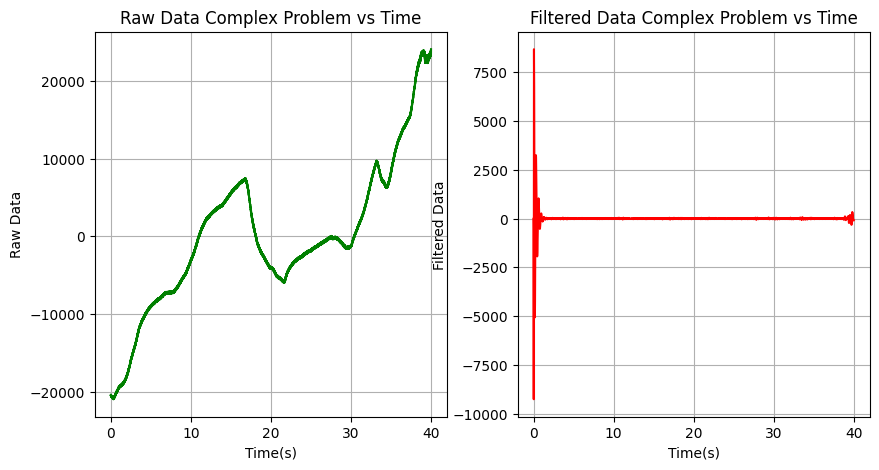

In [80]:

#Problema:
#Simple: 
#Complejo: 

sampling_rate=Ts

t_start=0
sample_start= t_start*sampling_rate

t_end=30
sample_end=t_end*sampling_rate

#Frecuencias de corte
low_cutoff_wide=3
high_cutoff_wide=30

filtered_signal_3_30=bsnb.bandpass(pre_ch4_PC, low_cutoff_wide,high_cutoff_wide,order=6,fs=250)
time=bsnb.generate_time(pre_ch4_PC,fs)

X1=ft.fftshift(ft.fft(pre_ch4_PC))
X2=ft.fftshift(ft.fft(filtered_signal_3_30))
#n1=np.arange(len(X1)); n2=np.arange(len(X2))
w1=fundamental_range_freq(X1); w2=fundamental_range_freq(X2)


n=np.arange(len(pre_ch4_PC))
plt.figure(2, figsize=(10,5))
plt.subplot(121)
plt.plot(n*Ts,pre_ch4_PC,"g")
plt.xlabel("Time(s)")
plt.ylabel("Raw Data")
plt.title("Raw Data Complex Problem vs Time")
plt.grid()
#plt.line(time, signal, legend_label="Datos Originales")
plt.subplot(122)
plt.plot(time,filtered_signal_3_30,"r")
plt.xlabel("Time(s)")
plt.ylabel("Filtered Data")
plt.title("Filtered Data Complex Problem vs Time")
plt.grid()




<class 'numpy.ndarray'>


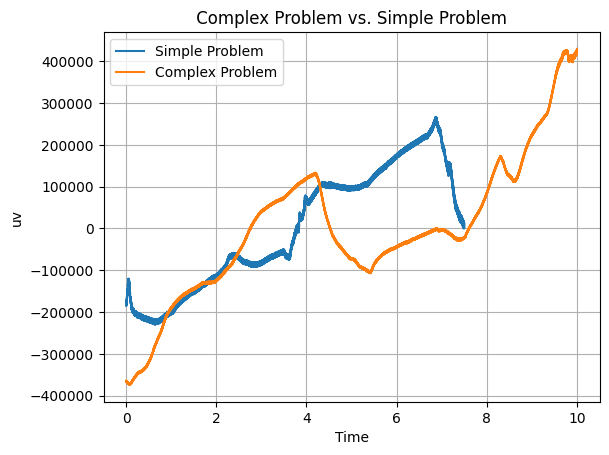

In [90]:
#Comparation


pre_ch4_PS_uv=bsnb.raw_to_phy("EEG", device="biosignalsplux", raw_signal=pre_ch4_PS, resolution=2, option="uV")
pre_ch4_PC_uv=bsnb.raw_to_phy("EEG", device="biosignalsplux", raw_signal=pre_ch4_PC, resolution=2, option="uV")
print(type(pre_ch4_PS))
#signal_ac=signal_acoustic - mean(signal_acoustic)

time_eeg_1=bsnb.generate_time(pre_ch4_PS_uv)
time_eeg_2=bsnb.generate_time(pre_ch4_PC_uv)


plt.figure(3)
plt.title(" Complex Problem vs. Simple Problem ")
plt.xlabel("Time"); plt.ylabel("uv")
plt.plot(time_eeg_1,pre_ch4_PS_uv )
plt.plot(time_eeg_2,pre_ch4_PC_uv )
plt.legend(["Simple Problem","Complex Problem"])
plt.grid()



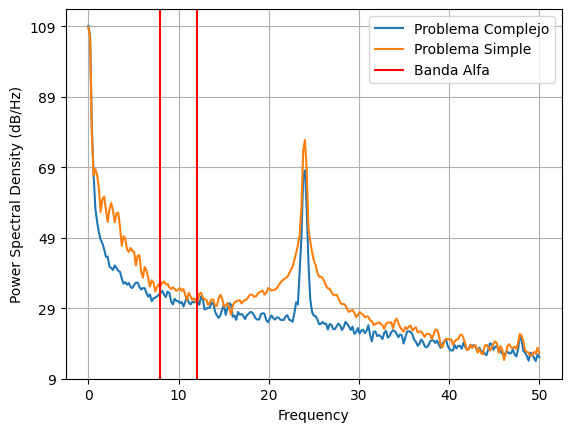

In [135]:

plt.figure(4)
#psd, frecuencias
[a1,a2]=plt.psd(pre_ch4_PC_uv,512,1/0.01,label="Ch1PS")
[b1,b2]=plt.psd(pre_ch4_PS_uv,512,1/0.01,label="Ch1PS")
plt.axvline(x=8, ymin=0, ymax=84, color="r")
plt.axvline(x=12, ymin=0, ymax=84,color="r")
plt.legend(["Problema Complejo", "Problema Simple", "Banda Alfa"])
#Linea de 8 a 12


In [136]:
freq_low = 8 #lower limit for alpha band
freq_high = 12 #Upper limit for alpha band


#complex_problem= logical_and(freq_axis_eyes_closed >= freq_low, freq_axis_eyes_closed <= freq_high)

#Find the intersection Values of the alpha band in the frequency vector [Eyes Opened]
#simple_problem= logical_and(freq_axis_eyes_opened >= freq_low, freq_axis_eyes_opened <= freq_high)

#Complex problem:

alpha_power_complex_problem = trapz(a1[8:13],a2[8:13])
print(alpha_power_complex_problem)

#Simple Problem 
alpha_power_simple_problem = trapz(b1[8:13],b2[8:13])
print(alpha_power_simple_problem)
print("conclusion: Hay una menor actividad en la banda alfa cuando hay un problema complejo que simple ") 

22739.78329079062
515887.2939330552
conclusion: Hay una mayor actividad en la banda alfa cuando hay un problema simple que complejo 


In [112]:


f2 = open("Lab5_ojocerrados 30.txt","r")
raw_data2 = f2.readline()  # con f.read() leemos todo el contenido
f2.close()

f3 = open("Lab5_ojos abiertos.txt","r")
raw_data3 = f3.readline()  # con f.read() leemos todo el contenido
f3.close()

x2 = re.findall("[0-5][0-9]\d", raw_data2)

x3 = re.findall("[0-5][0-9]\d", raw_data3)

fs=1000
Ts=1/fs

signal2 = np.genfromtxt("./Lab5_ojocerrados 30.txt", delimiter="	",skip_header = 2)
signal3 = np.genfromtxt("./Lab5_ojos abiertos.txt", delimiter="	",skip_header = 2)

signal_2=signal2[:,-2]-(sum(signal2[:,-2])/len(signal2[:,-2]))
signal_3=signal3[:,-2]-(sum(signal3[:,-2])/len(signal3[:,-2]))
print(signal2[:,-2])


[540. 538. 536. ... 481. 479. 479.]


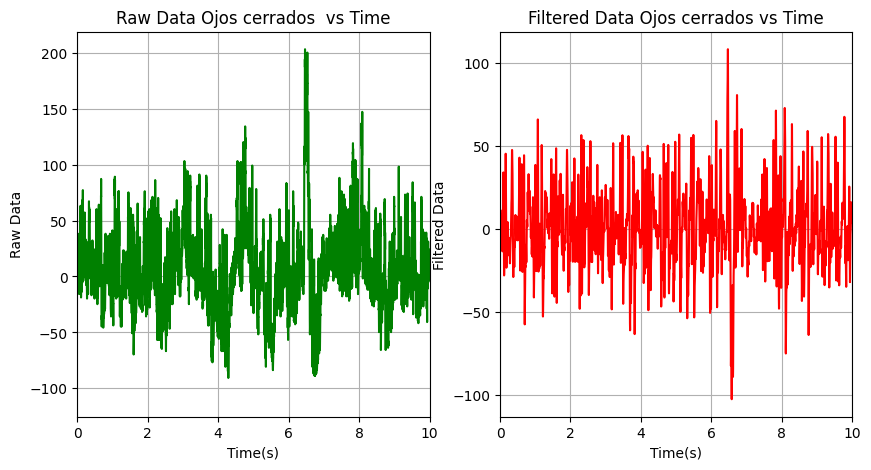

In [113]:

sampling_rate=Ts

t_start=0
sample_start= t_start*sampling_rate

t_end=30
sample_end=t_end*sampling_rate

#Frecuencias de corte

low_cutoff_wide=3
high_cutoff_wide=30

filtered_signal_3_30=bsnb.bandpass(signal_2, low_cutoff_wide,high_cutoff_wide,order=2,fs=1000)
time=bsnb.generate_time(signal_2,fs)

#X1=ft.fftshift(ft.fft(pre_ch4_PS))
#X2=ft.fftshift(ft.fft(filtered_signal_3_30))
#n1=np.arange(len(X1)); n2=np.arange(len(X2))
#w1=fundamental_range_freq(X1); w2=fundamental_range_freq(X2)


n=np.arange(len(signal_2))
plt.figure(5, figsize=(10,5))
plt.subplot(121)
plt.plot(n*Ts,signal_2,"g")
plt.xlabel("Time(s)")
plt.ylabel("Raw Data")
plt.xlim([0,10])
plt.title("Raw Data Ojos cerrados  vs Time")
plt.grid()
#plt.line(time, signal, legend_label="Datos Originales")
plt.subplot(122)
plt.plot(time,filtered_signal_3_30,"r")
plt.xlabel("Time(s)")
plt.ylabel("Filtered Data")
plt.title("Filtered Data Ojos cerrados vs Time")
plt.xlim([0,10])
plt.grid()


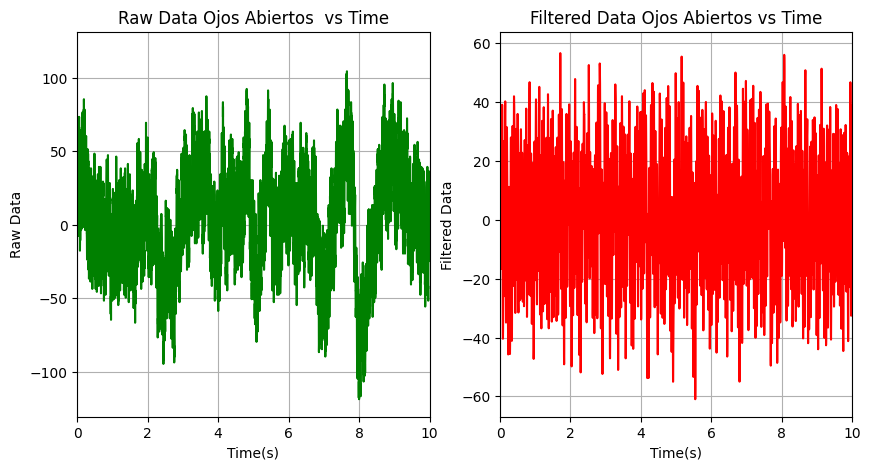

In [115]:

sampling_rate=Ts

t_start=0
sample_start= t_start*sampling_rate

t_end=30
sample_end=t_end*sampling_rate

#Frecuencias de corte

low_cutoff_wide=3
high_cutoff_wide=30

filtered_signal_3_30=bsnb.bandpass(signal_3, low_cutoff_wide,high_cutoff_wide,order=2,fs=1000)
time=bsnb.generate_time(signal_3,fs)

#X1=ft.fftshift(ft.fft(pre_ch4_PS))
#X2=ft.fftshift(ft.fft(filtered_signal_3_30))
#n1=np.arange(len(X1)); n2=np.arange(len(X2))
#w1=fundamental_range_freq(X1); w2=fundamental_range_freq(X2)


n=np.arange(len(signal_3))
plt.figure(6, figsize=(10,5))
plt.subplot(121)
plt.plot(n*Ts,signal_3,"g")
plt.xlabel("Time(s)")
plt.ylabel("Raw Data")
plt.xlim([0,10])
plt.title("Raw Data Ojos Abiertos  vs Time")
plt.grid()
#plt.line(time, signal, legend_label="Datos Originales")
plt.subplot(122)
plt.plot(time,filtered_signal_3_30,"r")
plt.xlabel("Time(s)")
plt.ylabel("Filtered Data")
plt.title("Filtered Data Ojos Abiertos vs Time")
plt.xlim([0,10])
plt.grid()


<class 'numpy.ndarray'>


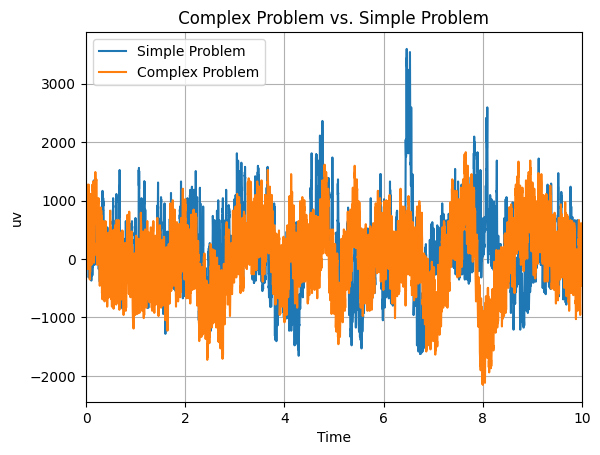

In [125]:
#Comparation

import biosignalsnotebooks as bsnb
print(type(signal2))
signal2_uv=bsnb.raw_to_phy("EEG", device="biosignalsplux", raw_signal=signal_2, resolution=2, option="uV")
signal3_uv=bsnb.raw_to_phy("EEG", device="biosignalsplux", raw_signal=signal_3, resolution=2, option="uV")

#signal_ac=signal_acoustic - mean(signal_acoustic)

time_eeg_1=bsnb.generate_time(signal2_uv)
time_eeg_2=bsnb.generate_time(signal3_uv)


plt.figure(7)
plt.title(" Complex Problem vs. Simple Problem ")
plt.xlabel("Time"); plt.ylabel("uv")
plt.plot(time_eeg_1,signal2_uv)
plt.plot(time_eeg_2,signal3_uv)
plt.legend(["Simple Problem","Complex Problem"])
plt.xlim([0,10])
plt.grid()


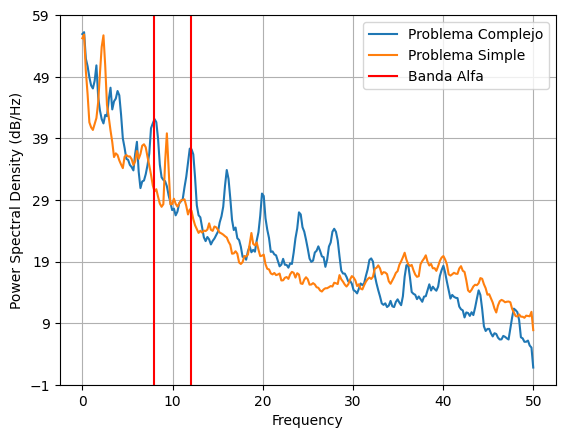

In [129]:
plt.figure(8)
#psd, frecuencias
[a1,a2]=plt.psd(signal2_uv,512,1/0.01,label="Ch1PS")
[b1,b2]=plt.psd(signal3_uv,512,1/0.01,label="Ch1PS")
plt.axvline(x=8, ymin=0, ymax=84, color="r")
plt.axvline(x=12, ymin=0, ymax=84,color="r")
plt.legend(["Problema Complejo", "Problema Simple", "Banda Alfa"])
#Linea de 8 a 12


In [134]:

freq_low = 8 #lower limit for alpha band
freq_high = 12 #Upper limit for alpha band


#complex_problem= logical_and(freq_axis_eyes_closed >= freq_low, freq_axis_eyes_closed <= freq_high)

#Find the intersection Values of the alpha band in the frequency vector [Eyes Opened]
#simple_problem= logical_and(freq_axis_eyes_opened >= freq_low, freq_axis_eyes_opened <= freq_high)

#Complex problem:

alpha_power_ojos_cerrados = trapz(a1[8:13],a2[8:13])
print(alpha_power_ojos_cerrados)

#Simple Problem 
alpha_power_ojos_abiertos = trapz(b1[8:13],b2[8:13])
print(alpha_power_ojos_abiertos)
print("conclusion: Hay una mayor actividad en la banda alfa cuando hay un ejercicio con ojos abiertos. ") 


28085.931096317818
109020.45478373341
conclusion: Hay una mayor actividad en la banda alfa cuando hay un problema simple que complejo 


## EXTRACCION DE CARACTERISTICAS DE EEG ##

En el análisis de EEG se analiza la actividad eléctrica del cerebro, pudiéndose ver la función cerebral, diagnosticas trastornos neurológicos y ayudar en la investigación científica. Si bien el EEG no sigue un patrón fijo su interpretación implica analizar y comparar las características de las ondas cerebrales registradas con patrones normales o anormales, tomando en consideración las diferentes frecuencias a las que pueden estar las ondas [1] [2].

- •	Tipos de ondas cerebrales:
    - 	Delta ( < 4 Hz): Al ser de baja frecuencia se aprecian típicamente en etapas de sueño profundo y en algunas lesiones cerebrales [3]

    - 	Theta (4 - 8 Hz):  Asociadas con la relajación, la meditación y algunas etapas del sueño [3] 
    - 	Alpha o mu (8 - 13 Hz): Presentes en el estado de relajación o meditación, asimismo, puede estar presente en un estado de atención selectiva [3]
    - 	Beta ( > 13 Hz):  Ondas de alta frecuencia que se asocian con la actividad mental activa, como la concentración y el estado de alerta [3]
    
Aquí podemos apreciar que al momento de hacer que una persona resuelva un problema simple se obtuvo mayor actividad en el canal 4. El cuál se ve incrementado al pasar de un problema simple a uno complejo, como se aprecia en la señal roja.
 
No obstante, estas señales presentan ruido pudiendo generar dificultades en la interpretación, por lo que se procede a filtrarla con un pasa banda con frecuencias de corte en 3 Hz y 30 Hz, para poder analizar los diversos tipos de ondas.

Tras ello comparamos los estímulos captados por la resolución mental de los problemas y concluimos que hay un mayor pico en la resolución de un problema complejo que en uno simple. Ello podemos adjudicarlo al nivel de concentración que se requiere para su resolución.
 
Con ello presente, analizamos la banda alfa que se encuentra presente en un estado de atención selectiva:


En esta gráfica obtenemos un pico entre 20 y 30 Hz siendo una clara representación de la onda beta; sin embargo, nuestro análisis se centra en la banda alfa posicionada en la zona roja señalada.
 
Pese a que anteriormente interpretamos que la actividad cerebral se incrementa ante la resolución de un problema complejo, aquí podemos apreciar que la atención selectiva es mayor en la resolución de un problema simple y que lo anteriormente mencionado sería válido a nivel de actividad y concentración general del cerebro (onda beta).
 
Por otro lado, también analizamos la actividad presente en la acción de tener los ojos abiertos y cerrados. Es relevante este análisis porque permite evaluar y comparar la actividad cerebral en diferentes estados de conciencia y condiciones sensoriales:

-	Cuando los ojos están abiertos se produce mayor estimulación visual y auditiva en el cerebro; disminuyendo la amplitud de las ondas alfa en contraste con el estado de los ojos cerrados [4]. 
- Cuando los ojos están cerrados la atención del cerebro se desvía de las señales externas y entra en un estado de relajación incrementándose la actividad alfa en el EEG, reflejándose un estado de calma y relajación [4].

Referencias:
[1] M. C. Levin. "Electroencefalografía (EEG) - Trastornos neurológicos - Manual MSD versión para profesionales". Manual MSD versión para profesionales. https://www.msdmanuals.com/es-pe/professional/trastornos-neurológicos/pruebas-y-procedimientos-neurológicos/electroencefalografía-eeg#:~:text=El%20EEG%20de%20vigilia%20normal,Hz%20y%2020-100%20muV.
 
[2] F. Ramos-Argüelles, G. Morales, S. Egozcue, R. M. Pabón y M. T. Alonso, "Técnicas básicas de electroencefalografía: principios y aplicaciones clínicas", Anales del Sist. Sanitario de Navarra, vol. 32, 2009. Accedido el 3 de junio de 2023. [En línea]. Disponible:  https://doi.org/10.4321/s1137-66272009000600006
 
[3] "¿Qué son las ondas Cerebrales? - NeuroFeedBack Barcelona". NeuroFeedBack Barcelona.  https://www.neurofeedback.cat/que-son-las-ondas-cerebrales/#:~:text=Ondas%20Theta:%204-8%20Hz,Ondas%20Gamma:%2030-90%20Hz.
 
[4] "Análisis espectral del EEG en sujetos con ojos abiertos y ojos cerrados: resultados preliminares | In. Centro Nacional de Investigaciones Científicas. Estudios avanzados en neurociencias. s.l, Centro Nacional de Investigaciones Científicas, 1987. p.239-250, ilus, tab. | LILACS". Pesquisa | Portal Regional da BVS.  https://pesquisa.bvsalud.org/portal/resource/pt/lil-60568.
